In [1]:
# Mengimport Library
import pandas as pd
from IPython.display import display
pd.set_option('future.no_silent_downcasting', True)
# # Tampilkan semua baris
# pd.set_option('display.max_rows', None)

# # Tampilkan semua kolom
# pd.set_option('display.max_columns', None)

# # Tampilkan semua data dalam satu baris tanpa wrap (memanjang ke samping)
# pd.set_option('display.expand_frame_repr', False)

# # Set lebar maksimal kolom agar tidak terpotong
# pd.set_option('display.max_colwidth', None)

In [2]:
# Membaca Dataset
dataset_scoring_dqlab = pd.read_excel("file_excel\credit_scoring_dqlab.xlsx")

print(dataset_scoring_dqlab.columns.to_list())
display(dataset_scoring_dqlab.info())
display(dataset_scoring_dqlab.head())

['Unnamed: 0', 'kode_kontrak', 'pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               900 non-null    int64 
 1   kode_kontrak             900 non-null    object
 2   pendapatan_setahun_juta  900 non-null    int64 
 3   kpr_aktif                900 non-null    object
 4   durasi_pinjaman_bulan    900 non-null    int64 
 5   jumlah_tanggungan        900 non-null    int64 
 6   rata_rata_overdue        900 non-null    object
 7   risk_rating              900 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 56.4+ KB


None

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [3]:
# Data Preparation - Part 1
# Membuat dataset
dataset = dataset_scoring_dqlab.drop(columns=["Unnamed: 0", "kode_kontrak"], axis=1, inplace=False)
print(dataset.head())
print(dataset.describe().T[["min","max"]])

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  
                          min    max
pendapatan_setahun_juta  70.0  300.0
durasi_pinjaman_bulan    12.0   48.0
jumlah_tanggungan         0.0    6.0
risk_rating               1.0    5.0


In [4]:
# Mengubah data kpr_aktif menjadi tipe integer
print(dataset[dataset.select_dtypes("object").columns.to_list()].head())
for column in dataset[dataset.select_dtypes("object").columns.to_list()].columns.to_list():
  print(dataset[dataset.select_dtypes("object").columns.to_list()][column].unique())

  kpr_aktif rata_rata_overdue
0        YA      61 - 90 days
1        YA      61 - 90 days
2     TIDAK       0 - 30 days
3        YA      46 - 60 days
4     TIDAK      31 - 45 days
['YA' 'TIDAK']
['61 - 90 days' '0 - 30 days' '46 - 60 days' '31 - 45 days' '> 90 days']


In [5]:
dataset["kpr_aktif"] = dataset["kpr_aktif"].replace(["YA","TIDAK"],[1, 0])
print(dataset.head())

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295         1                     48   
1                      271         1                     36   
2                      159         0                     12   
3                      210         1                     12   
4                      165         0                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


In [6]:
# Data Preparation - Part 2
## Memeriksa nilai unik pada kolom rata_rata_overdue
print("Nilai unik pada kolom rata_rata_overdue")
print(dataset["rata_rata_overdue"].value_counts(), "\n")

## Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
  "rata_rata_overdue" : {
    "46 - 60 days" : 60,
    "0 - 30 days" : 30,
    "31 - 45 days" : 45,
    "61 - 90 days" : 90,
    "> 90 days" : 91
  }
}

dataset = dataset.replace(mapping_dict)

## Memeriksa nilai unik pada kolom rata_rata_overdue
print("Nilai unik pada kolom rata_rata_overdue")
print(dataset["rata_rata_overdue"].value_counts(), "\n")

## Menampilkan dataset dengan kolom yang sudah diubah
display(dataset.head())

Nilai unik pada kolom rata_rata_overdue
rata_rata_overdue
46 - 60 days    291
0 - 30 days     227
31 - 45 days    159
61 - 90 days    120
> 90 days       103
Name: count, dtype: int64 

Nilai unik pada kolom rata_rata_overdue
rata_rata_overdue
60    291
30    227
45    159
90    120
91    103
Name: count, dtype: int64 



,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,295,1,48,5,90,4
1,271,1,36,5,90,4
2,159,0,12,0,30,1
3,210,1,12,3,60,3
4,165,0,36,0,45,2


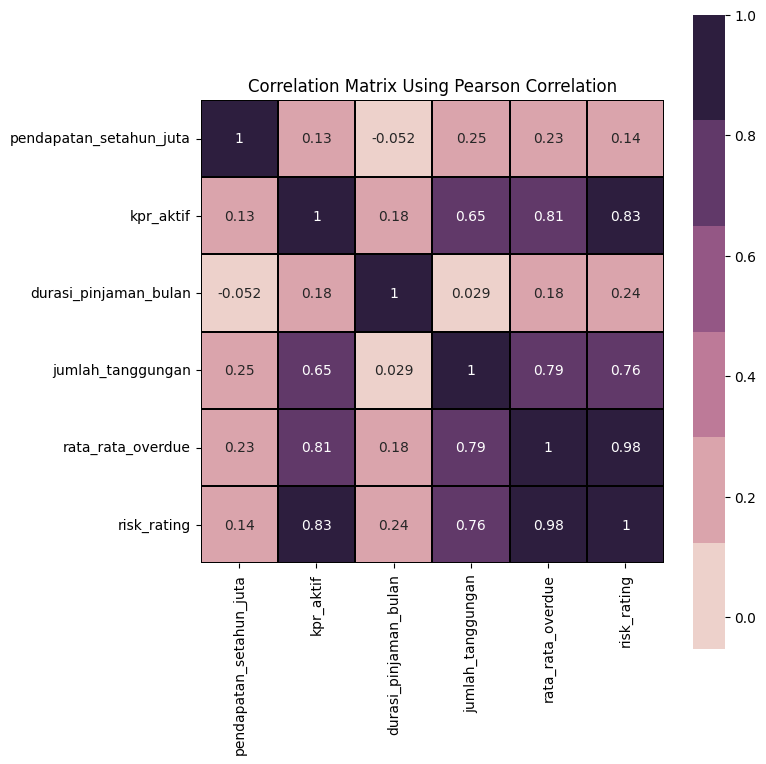

In [7]:
# Menentukan Korelasi Data dengan Pearson Correlation
## Melihat Korelasi Data
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(8,8))
plt.title("Correlation Matrix Using Pearson Correlation")
sns.heatmap(
  data=dataset.astype(float).corr(),
  linewidths=0.25,
  vmax=1,
  square=True,
  linecolor="black",
  annot=True,
  cmap=sns.cubehelix_palette()
  
)
plt.tight_layout()
plt.show()

In [8]:
# Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulanan
dataset = dataset.drop(columns=["pendapatan_setahun_juta","durasi_pinjaman_bulan"], axis=1)
display(dataset.head())

,kpr_aktif,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,5,90,4
1,1,5,90,4
2,0,0,30,1
3,1,3,60,3
4,0,0,45,2


In [9]:
# Tahap Modelling dengan Algoritma Machine Learning - Naive Bayes - Part 1
## Import Library
from sklearn.naive_bayes import GaussianNB

# Input variable x dengan kolom risk_rating, karena kolom risk_rating digunakan sebagai label, y (dependent)
x = dataset.drop(columns=["risk_rating"], axis=1)
display(x.head())

# Input variable y dengan drop kolom label
y = dataset['risk_rating'].astype("category")
display(y.head())

# Membagi data training dan data testing
from sklearn.model_selection import train_test_split

# Splitting data train 80% test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Menjalankan data training dengan naive bayes
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

# Menjalankan data testing
y_predict = model_nb.predict(x_test)
print(y_test)
print(y_predict)

,kpr_aktif,jumlah_tanggungan,rata_rata_overdue
0,1,5,90
1,1,5,90
2,0,0,30
3,1,3,60
4,0,0,45


0    4
1    4
2    1
3    3
4    2
Name: risk_rating, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

492    2
141    1
409    3
31     2
570    4
      ..
408    1
75     1
778    1
202    3
181    3
Name: risk_rating, Length: 180, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]
[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


1.0


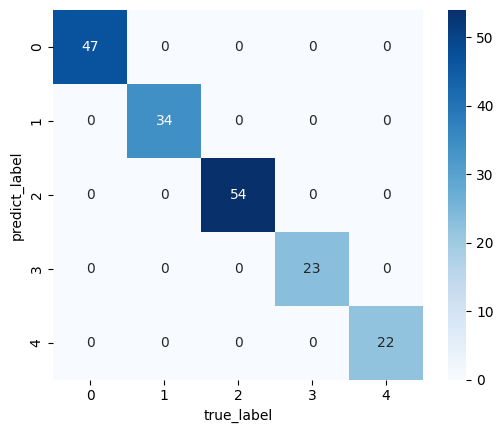

In [10]:
# Tahap Modelling dengan Algoritma Machine Learning - Naive Bayes - Part 2
## Menampilkan akurasi Model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

# Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(
  cm.T,
  square=True,
  annot=True,
  cmap="Blues"
)
plt.xlabel("true_label")
plt.ylabel("predict_label")
plt.show()

In [11]:
# Tahap Modelling dengan Algoritma Machine Learning K - Nearest Neighbor (KNN)
## Import Library
from sklearn.neighbors import KNeighborsClassifier

## Membuat objek model_knn
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

# Menjalankan data testing
y_predict = model_knn.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


1.0


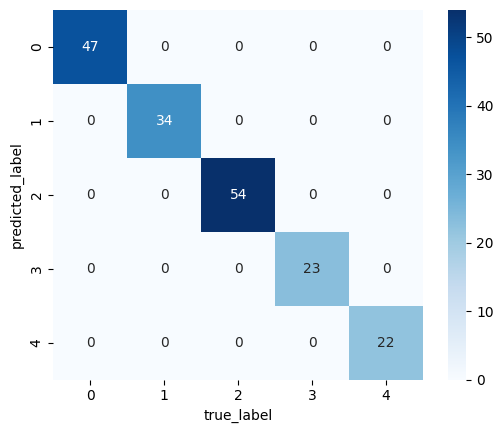

In [12]:
## Menampilkan Akurasi Model
print(accuracy_score(y_test, y_predict))

## Melakukan Evaluasi Model dengan Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(
  cm.T,
  square=True,
  annot=True,
  cmap="Blues"
)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()

Accuracy score:  0.8722222222222222


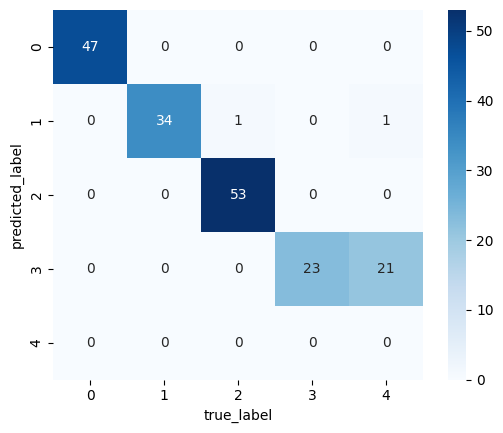

In [18]:
# Mini Project - Part 1
## Import library LogisticRegression
from sklearn.linear_model import LogisticRegression

## Membuat object model_lr
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(x_train, y_train)

## Menjalankan data testing
y_predict = model_lr.predict(x_test)

## Menampilkan akurasi model
print("Accuracy score: ", accuracy_score(y_test, y_predict))

## Melakukan evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(
  cm.T,
  square=True,
  annot=True,
  cmap="Blues"
)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()
